In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargamos CSV
df = pd.read_csv("/content/drive/Shareddrives/Data_TFM/orders_2023_22_21.csv", sep="	", decimal=".",  na_values=['(null)'])
df.head()

,unique_venue_id,year,month,content_channel_name,online_order_segment,payment_method_name,saas_product,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate
0,1.100037e+10,2023.0,3.0,Marketplace,1.Newbie,Pay at venue,tw_connect,5,615.386107,123.077221,123.08,0.200005,1.0,234.915355,234.915355,46.98,0.199987
1,1.100037e+10,2023.0,3.0,Marketplace,3.Explorer,PayPal,tw_connect,5,83.000000,16.600000,29.05,0.350000,2.0,83.000000,41.500000,29.05,0.350000
2,1.100033e+10,2023.0,3.0,Marketplace,4.Loyal,Apple Pay,tw_connect,15,264.000000,17.600000,5.28,0.020000,1.0,36.500000,36.500000,0.73,0.020000
3,1.100039e+10,2023.0,3.0,Marketplace,4.Loyal,Apple Pay,tw_connect,22,349.000000,15.863636,6.98,0.020000,2.0,27.000000,13.500000,0.54,0.020000
4,1.100033e+10,2023.0,3.0,Widget,4.Loyal,Pay at venue,tw_connect,113,500.010000,4.424867,0.00,0.000000,10.0,65.010000,6.501000,0.00,0.000000


Variables
Todas las ordenes creadas en
'Year' y 'Month':
- DATE_PART('year',dim_tw_online_orders.created_date) AS YEAR,
- DATE_PART('month',dim_tw_online_orders.created_date) AS MONTH



In [4]:
#min created
print(f'Del dataset, primera order creada fue en {df.year.min()} y la ultima order creada fue {df.year.max()}')

year_df= df.groupby(['year'])['gross_orders'].sum().reset_index().set_index(['year'])
ax=year_df.plot.bar()
ax.set_xlabel('')
ax.set_ylabel('Count')
plt.show()

 
 Del dataset, primera order creada fue en 2021.0 y la ultima order creada fue 2023.0


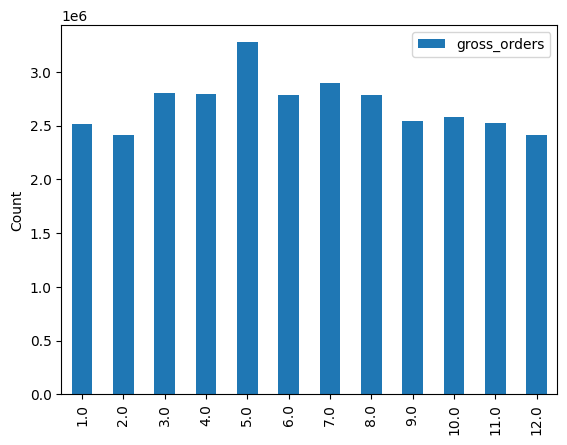

In [10]:
month_df= df.groupby(['month'])['gross_orders'].sum().reset_index().set_index(['month'])
ax=month_df.plot.bar()
ax.set_xlabel('')
ax.set_ylabel('Count')
plt.show()

Caracteristicas de las ordenes por canal y tipo de producto
- dim_tw_online_orders.content_channel_name
- fct_tw_online_items.saas_product


**content_channel_name**

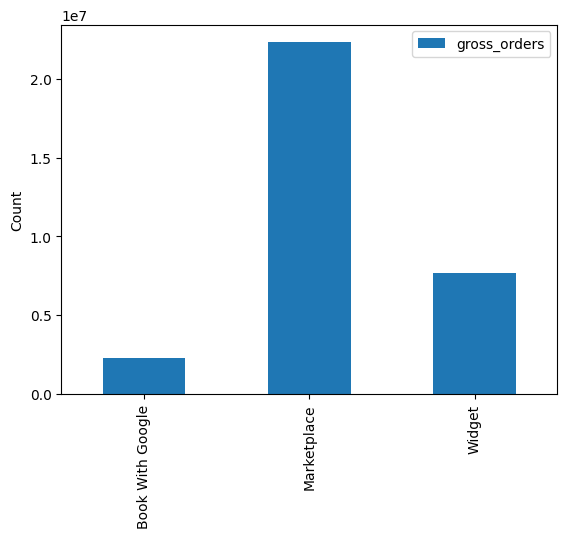

In [11]:
chn_df= df.groupby(['content_channel_name'])['gross_orders'].sum().reset_index().set_index(['content_channel_name'])
ax=chn_df.plot.bar()
ax.set_xlabel('')
ax.set_ylabel('Count')
plt.show()

En un mes pueden haber varios canales?

In [13]:
chn_conte1= df.groupby(['unique_venue_id'	,'year',	'month'])['content_channel_name'].nunique().sort_values(ascending=False)
chn_conte1.reset_index().groupby('content_channel_name')[['unique_venue_id'	,'year',	'month']].count().reset_index().sort_values(['content_channel_name'], ascending=True)

,content_channel_name,unique_venue_id,year,month
0,1,323569,323569,323569
1,2,210269,210269,210269
2,3,145697,145697,145697


# agregar %ordenes por canal del tipo venue, mes, año %ordener book google, % ordener book byMP, % ordenes por widget.

#Cuantos canales usa por mes la venue

Existen 145697 casos en que venues tuvieron los 3 canales en el mismo mes.

**saas_product** : The name of the SaaS tool that the venue is using.

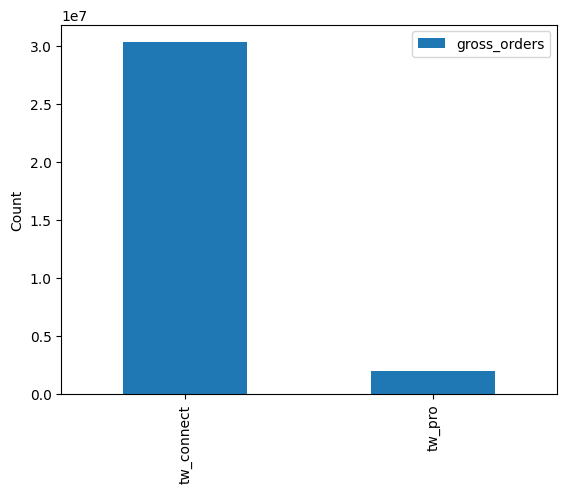

In [15]:
saas_df= df.groupby(['saas_product'])['gross_orders'].sum().reset_index().set_index(['saas_product'])
ax=saas_df.plot.bar()
ax.set_xlabel('')
ax.set_ylabel('Count')
plt.show()

In [35]:
saas_conte1= df.groupby(['unique_venue_id'	,'year',	'month'])['saas_product'].nunique().sort_values(ascending=False)
saas_conte1.reset_index().groupby('saas_product')[['unique_venue_id'	,'year',	'month']].count().reset_index().sort_values(['saas_product'], ascending=True)

,saas_product,unique_venue_id,year,month
0,1,678785,678785,678785
1,2,750,750,750


In [36]:
#ejemplo
aux=df.groupby(['unique_venue_id'	,'year',	'month'])['saas_product'].nunique()
aux=aux.reset_index()
aux.loc[aux['saas_product']==2]

df.loc[(df['unique_venue_id']==12000000439) & (df['month']==7) ]


,unique_venue_id,year,month,content_channel_name,online_order_segment,payment_method_name,saas_product,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate
3510566,12000000439,2022.0,7.0,Marketplace,3.Explorer,Apple Pay,tw_pro,1,40.0,40.0,0.0,0.0,(null),(null),(null),(null),(null)
3785113,12000000439,2022.0,7.0,Marketplace,3.Explorer,PayPal,tw_connect,1,28.0,28.0,7.0,0.25,(null),(null),(null),(null),(null)


Es posible que en un mes, una venue tenga mas de un product saas